In [162]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import minimize

## Problem 1
$$
K_{a}(k) = \log \int e^{k\left(r(w) - \langle r \rangle^a\right)}P^a(w)dw = \log \int e^{k\left(r(w) - \langle r \rangle^a\right)} \frac{P^a(w)}{P^b(w)}P^b(w)dw
$$
by Jensen’s inequality
$$
\log \int e^{k\left(r(w) - \langle r \rangle^a\right)} \frac{P^a(w)}{P^b(w)}P^b(w)dw \ge \int \log\left[ e^{k\left(r(w) - \langle r \rangle^a\right)} \frac{P^a(w)}{P^b(w)}\right]P^b(w)dw = \int k\left(r(w) - \langle r \rangle^a\right)P^b(w)dw + \int  P^b(w) \log \frac{P^a(w)}{P^b(w)} dw = k \left( \langle r \rangle^b - \langle r \rangle^a\right) - KL(P^b || P^a)
$$

for $P^a = \mathcal{N}(\mu_a, \sigma_a^2),\ P^b = \mathcal{N}(\mu_b, \sigma_b^2): K_{a}(k) = \frac{1}{2}\sigma_a^2 k^2 \Rightarrow$

$$
 \frac{1}{2}\sigma_a^2 k^2 - k\left(\langle r \rangle^b - \langle r \rangle^a\right) + KL(P^b || P^a) \ge 0 - parabola \Rightarrow k_{min} = \frac{\langle r \rangle^b - \langle r \rangle^a}{\sigma_a^2}
$$
$$
\langle r \rangle^b - \langle r \rangle^a \le \sigma_a\sqrt{2  KL(P^b || P^a)}
$$

## Problem 2: MLE with scipy.minimize

One needs to find which source distribution was most likely used to generate `unknown_sample.txt`

- Gamma distribution, where $k$ is shape, $\theta = 1$ is scale, $\Gamma$ is Gamma function

$$p_{gamma}(x) = x^{k-1} \ \frac{e^{-x/\theta}}{\theta^k \ \Gamma(k)}$$


- or Gumbel distribution, where $\mu$ is the mode, and $\beta=1$ is the scale

$$ p_{gumbel}(x) = \frac{e^{-(x - \mu)/ \beta}}{\beta} e^{ -e^{-(x - \mu)/ \beta}} $$


In this task we ask you to use `scipy.minimize` to maximize $\log L$, i.e. minimize its negative value.
Scale parameters $\theta$ and $\beta$ here are constant and equal to 1 for both distributions, so you can simpify PDFs.

### Restoring the true distribution
Write down the likelihood $L$ and  the negative log-likelihood  for $p_{gamma}(x, k)$, $p_{gumbel}(x, \mu)$ and sample $x = \{x_0, ..., x_n\}$



$$
L_{p_{gamma}(x, k)} = \prod_{i=1}^n x_i^{k-1} \frac{e^{-x_i / \theta}}{\theta^k  \Gamma(k)} = \left(\frac{1}{\theta^k  \Gamma(k)}\right)^n\prod_{i=1}^n x_i^{k-1} e^{-x_i / \theta}
$$
$$
- \log L_{p_{gamma}(x, k)} = nk \log \theta + n \log  \Gamma(k) - \left(k-1\right)\sum_{i=1}^n \log x_i + \frac{\sum_{i=1}^n  x_i }{\theta}
$$

$$
L_{p_{gumbel}(x, \mu)} = \prod_{i=1}^n \frac{e^{-(x_i - \mu)/ \beta}}{\beta} e^{ -e^{-(x_i - \mu)/ \beta}} = \left(\frac{1}{\beta}\right)^n\prod_{i=1}^n e^{-(x_i - \mu)/ \beta -e^{-(x_i - \mu)/ \beta}}
$$
$$
- \log L_{p_{gumbel}(x, \mu)} = n \log \beta +\sum_{i=1}^n  \frac{(x_i - \mu)} {\beta} + e^{-(x_i - \mu)/ \beta}
$$

In the code block below sample `x` is already imported as a global variable. Implement `neg_loglikelihood_gamma` as a function of $k$ and `neg_loglikelihood_gumbel` as a function of $\mu$. Use numpy and scipy.special where needed.

Run the minimizer with given initial parameters using this call

    result = minimize(func, init_param, method = 'Nelder-Mead', options={'disp': True})

Check the result. Answer the following questions

1. What is the most probable value of shape $\hat{k}$ if the distribution was $p_{gamma}$?


2. What is the most probable value of mode $\hat{\mu}$ if the distribution was $p_{gumbel}$?


3. Which distribution has the highest probability to be the true one?

Ensure that your solution is correct by plotting both PDFs with found $\hat{k}$ and $\hat{\mu}$ over the histogram of the sample.

In [163]:
x = np.loadtxt('unknown_sample.txt')


gamma_k0 = 0.1
gumbel_mu0 = 0.1


def neg_loglikelihood_gamma(k):
    # theta = 1 => log(theta) = 0
    return x.shape[0] * scipy.special.gamma(k) - (k - 1) * sum(np.log(x)) + sum(x)


def neg_loglikelihood_gumbel(mu):
    # beta = 1 => log(beta) = 0
    return sum(x - mu) + sum(np.exp(-x + mu))


result_gamma = minimize(neg_loglikelihood_gamma, gamma_k0, method = 'Nelder-Mead', options={'disp': True})
result_gumbel = minimize(neg_loglikelihood_gumbel, gumbel_mu0, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 2552.487484
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1552.163758
         Iterations: 21
         Function evaluations: 42


In [156]:
print('\n'.join([
    f"Solution for k: {result_gamma.x[0]}, value of neg_loglikelihood_gamma: {result_gamma.fun}",
    f"Solution for mu: {result_gumbel.x[0]}, value of neg_loglikelihood_gumbel: {result_gumbel.fun}"
]))

Solution for k: 2.121093750000008, value of neg_loglikelihood_gamma: 2552.4874838423607
Solution for mu: 1.5393750000000055, value of neg_loglikelihood_gumbel: 1552.1637582858993


Since `neg_loglikelihood_gumbel < neg_loglikelihood_gamma`, therefore Gumbel is more probable.

Check below.

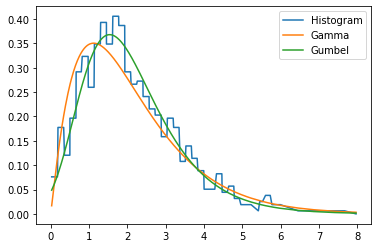

In [157]:
from scipy import stats

def pdf_gamma(x, k):
    return x ** (k - 1) * np.exp(-x) / scipy.special.gamma(k)


def pdf_gumbel(x, mu):
    return np.exp(- x + mu) * np.exp(- np.exp(- x + mu))

hist = np.histogram(x, bins=50)
hist_dist = stats.rv_histogram(hist)
plt.plot(np.sort(x), hist_dist.pdf(np.sort(x)), label='Histogram')
plt.plot(np.sort(x), pdf_gamma(np.sort(x), result_gamma.x[0]), label='Gamma')
plt.plot(np.sort(x), pdf_gumbel(np.sort(x), result_gumbel.x[0]), label='Gumbel')
plt.legend();

### Automatic differentiation

Some optimization methods like BFGS (Broyden–Fletcher–Goldfarb–Shanno) use first and second order derivatives of given function. To simplify calculations of gradients, jacobians and hessians, we are going to employ an autograd package, able to differentiate native python and numpy code. 

Package: https://github.com/HIPS/autograd

This package is a "drop-in" replacement for many numpy and some scipy methods. To check what special functions are supported you need to look through [the source code](https://github.com/HIPS/autograd/blob/master/autograd/scipy/special.py) of correspondent module.

Automatic differentiation (autograd) mechanics is not a numerical approximations (a.k.a finite difference methods). Instead of this, using chain rules of differentiation it tracks every elementary operation performed on input data and stores a gradient as a numerical value.

- examples of computational graphs\
  https://en.wikipedia.org/wiki/Automatic_differentiation
  

- explanation of autograd mechanics\
  https://github.com/HIPS/autograd/blob/master/docs/tutorial.md#whats-going-on-under-the-hood
  

There are other framework with similar abilities, for instance 
[PyTorch](https://pytorch.org/), 
[JAX](https://github.com/google/jax) (successor of autograd), 
[TensorFlow](https://www.tensorflow.org/), 
[Theano](https://github.com/Theano/Theano), 
[MATLAB](https://www.mathworks.com/help/deeplearning/ug/include-automatic-differentiation.html) and even
[StalinGRAD](https://github.com/Functional-AutoDiff/STALINGRAD) :)

To install autograd in your conda/venv environment (my is called `base`) run

`(base) $ pip install autograd`

Look through example below and check that native differentiation works with Cobb-Douglas production function

$$ f(x, y) = x^{0.8} \ y^{0.2} $$

In [ ]:
#!pip install autograd

In [69]:
from autograd import grad

def f(x, y):
    return x ** 0.8 * y ** 0.2

def f_x(x, y):
    return 0.8 * x ** (- 0.2) * y ** 0.2

def f_y(x, y):
    return 0.2 * x ** 0.8 * y ** (- 0.8)


# first derivatives for f(x,y), x is position 0 (default) and y is 1
dfdx = grad(f)
dfdy = grad(f, 1)

# suppose values for x and y are as follows
x, y = 2.0, 3.0

# evaluate the grads at x, y
print(f"autograd : {[dfdx(x,y), dfdy(x,y)]}")

# compare with analytical derivatives
print(f"analytical: {[f_x(x,y), f_y(x,y)]}")

autograd : [0.867577416958159, 0.14459623615969314]
analytical: [0.8675774169581589, 0.14459623615969314]


Defining a function using only np & scipy fundamental methods will make it autograd ready. Note that we need to run import statements again to rewrite references.

Take the code from the previous part and run BFGS optimization in the block below by calling
    
    minimize(func, init_param, jac=None, method = 'BFGS', options={'disp': True})
                     
Then provide optimizer with jacobians instead of `jac=None`. Use `jacobian` and `hessian` functions in the same way with `grad`.

Answer the following questions

4. Is there any difference between running the BFGS optimizer with and without a jacobian?


5. Do you spot any changes in an iterations number between BFGS and Nelder-Mead optimizers?

In [158]:
result_gamma = minimize(neg_loglikelihood_gamma, gamma_k0, jac=None, method = 'BFGS', options={'disp': True})
result_gumbel = minimize(neg_loglikelihood_gumbel, gumbel_mu0, jac=None, method = 'BFGS', options={'disp': True})

print('\n'.join([
    f"Solution for k: {result_gamma.x[0]}, value of neg_loglikelihood_gamma: {result_gamma.fun}",
    f"Solution for mu: {result_gumbel.x[0]}, value of neg_loglikelihood_gumbel: {result_gumbel.fun}"
]))

Optimization terminated successfully.
         Current function value: 2552.487484
         Iterations: 7
         Function evaluations: 20
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 1552.163758
         Iterations: 6
         Function evaluations: 18
         Gradient evaluations: 9
Solution for k: 2.121104240632824, value of neg_loglikelihood_gamma: 2552.4874837932994
Solution for mu: 1.5393936688857486, value of neg_loglikelihood_gumbel: 1552.163758113369


In [164]:
import autograd.numpy as np
import autograd.scipy as scipy

jac_gamma = grad(neg_loglikelihood_gamma)
jac_mu = grad(neg_loglikelihood_gumbel)


result_gamma = minimize(neg_loglikelihood_gamma, gamma_k0, jac=jac_gamma, method = 'BFGS', options={'disp': True})
result_gumbel = minimize(neg_loglikelihood_gumbel, gumbel_mu0, jac=jac_mu, method = 'BFGS', options={'disp': True})

print('\n'.join([
    f"Solution for k: {result_gamma.x[0]}, value of neg_loglikelihood_gamma: {result_gamma.fun}",
    f"Solution for mu: {result_gumbel.x[0]}, value of neg_loglikelihood_gumbel: {result_gumbel.fun}"
]))

Optimization terminated successfully.
         Current function value: 2552.487484
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 1552.163758
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Solution for k: 2.121104243176461, value of neg_loglikelihood_gamma: 2552.4874837932994
Solution for mu: 1.5393936319020247, value of neg_loglikelihood_gumbel: 1552.1637581133689


- Yes, there is a difference. In optimization with jacobian there are twice less function evaluations than in one without jacobian.
- There are much less iterations in BFGS optimizer in comparison with Nelder-Mead optimizer.

## Problem 3

- In this task one can observe 10 states $(home\rightarrow office | home\leftarrow office) \times (0;4 | 1;3 | 2;2 | 3;1 | 4;0)$. Last term denotes the number of sunglasses at home and in the office respectively.

     Lets denote probabilities of states $(0;4 | 1;3 | 2;2 | 3;1 | 4;0)\times(home\rightarrow office)$ as $s_1,...,s_5$ and $(0;4 | 1;3 | 2;2 | 3;1 | 4;0)\times(home\leftarrow office)$ as $s_6,...,s_{10}$ respectively. Then the following equations for this Markov chain hold:
     - $s_1 + s_{10} = (1-p)(s_6 + s_5)$
     - $s_5 + s_6 = p(s_2 + s_9) + 1\cdot(s_1 + s_{10})$
     - $s_2 + s_9 = p(s_5 + s_6) + (1-p)(s_4 + s_7)$
     - $s_4 + s_7 = p(s_3 + s_8) + (1-p)(s_2 + s_9)$
     - $s_3 + s_8 = p(s_4 + s_7) + (1-p)(s_3 + s_8) \Rightarrow$ solving them recurrently one can observe
     $$\frac{s_1 + s_{10}}{1-p} = s_2 + s_9 = s_3 + s_8 = s_4 + s_7 = s_5 + s_6$$
     From $\sum_i s_i = 1 \Rightarrow s_1 + s_{10} = \frac{1-p}{5-p}$. Hence the probability of suffering is $\frac{p(1-p)}{5-p}$.

- Number of sunglasses governs the amount of equalities in the above section. Therefore, if one denotes it as $N$ then 
$$\frac{s_1 + s_{2N}}{1-p} = s_2 + s_{2N - 1} = ... = s_{N} + s_{N+1},\ \sum_i s_i = 1 \Rightarrow$$
$$s_1 + s_{2N} = \frac{1-p}{N+1-p} \Rightarrow \frac{p(1-p)}{N+1-p} < 0.1 \Rightarrow N > 2$$
